# Credit Card Fraud Detection 

# * Data Pre Processing

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#Since our dataset is very large and due to computational limitaitons we have 
#take only 0.1 of dataset for analysis

In [7]:
data = dataset.sample(frac=0.1,random_state=1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1574.0,-0.615776,0.654356,2.618793,0.857434,-0.487340,0.593957,-0.095191,0.426786,0.011607,...,0.010440,0.113631,-0.313035,-0.015388,0.213878,-0.268579,0.117815,0.075734,9.99,0
240932,150813.0,-3.517229,3.326821,-3.590262,0.674769,-0.679266,-0.469516,-1.135362,2.778095,-2.404956,...,0.455767,0.388102,0.268986,0.382692,-0.653335,2.192962,-0.953907,-0.137082,0.76,0
3701,3169.0,-0.315540,1.054303,1.484711,1.138262,0.394713,-0.168883,0.737923,-0.061284,-0.952381,...,0.005626,0.094740,0.024370,0.091800,-0.463470,-0.457328,0.194541,0.166039,19.60,0
153365,98752.0,-3.580417,4.100916,-2.577720,-1.476718,-0.006201,-2.008418,0.887262,0.304192,2.879710,...,-0.194866,0.571678,-0.001519,0.009117,0.321669,0.034900,0.785417,0.353092,0.92,0


In [8]:
data.shape

(28481, 31)

# Checking null values

In [9]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
#there is no null values in the dataset..so no need of dealing of missing data

# Splitting of dependent(y)and independent(x) variables

In [11]:
x=data.iloc[:,1:30].values
y=data.iloc[:,30].values

In [12]:
x.shape
y.shape

(28481,)

# DATA VISUALIZATION

# Graphs

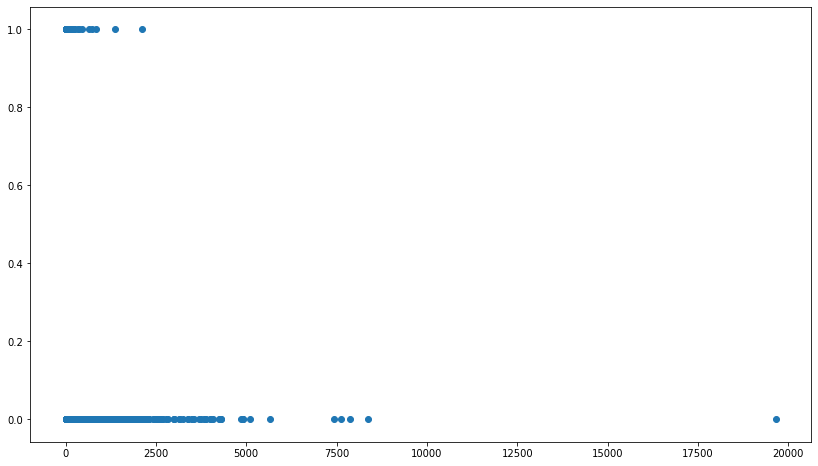

In [13]:
plt.scatter(x[:,28],y)

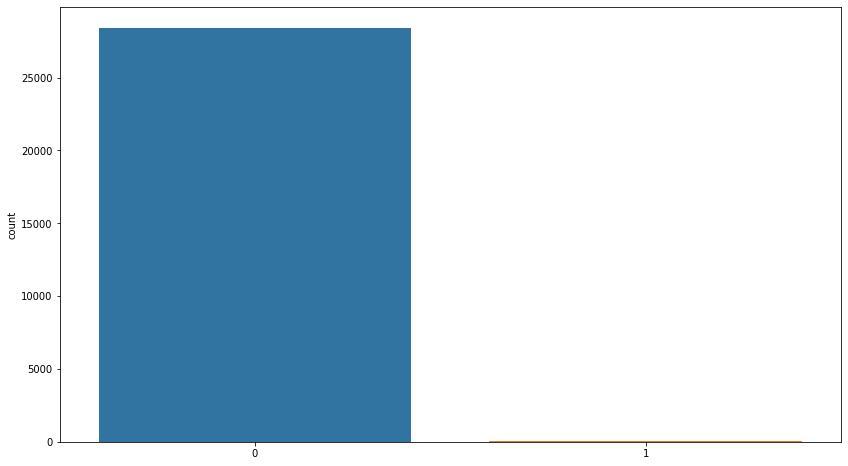

In [14]:
sns.countplot(y)

# Bargraph

<BarContainer object of 28481 artists>

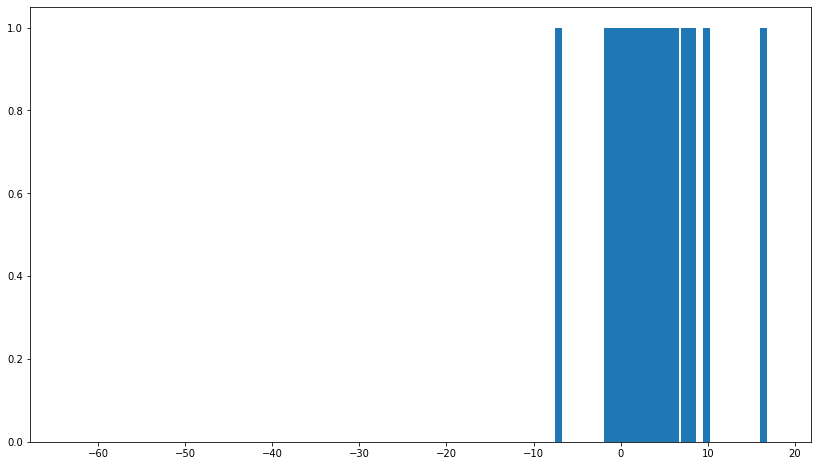

In [15]:
plt.bar(x[:,1],y)

In [16]:
#a brief visualization is done 

In [17]:
#as there is no non number columns,there is no need to do Label encoding

# Checking for categorical data to do One Hot Encoding

In [18]:
data.Class.dtype

dtype('int64')

In [19]:
#since there is no categorical data One hot encoding cannot be done to the dataset we correlate the data

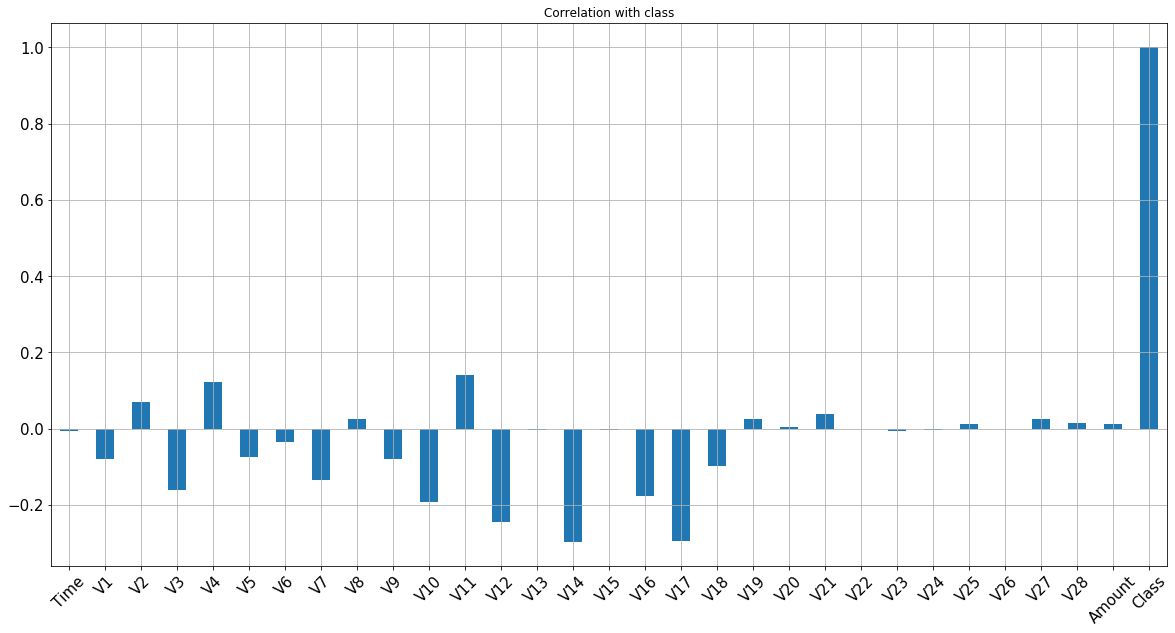

In [20]:
data.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [21]:
## Correlation Matrix
import seaborn as sn
sn.set(style="white")

# Compute the correlation matrix
corr = data.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.126475,-0.001584,-0.413547,-0.104527,0.182205,-0.060483,0.078924,-0.040474,-0.008428,...,0.041323,0.150603,0.047941,-0.020018,-0.229491,-0.048131,-0.005541,-0.004339,-0.026969,-0.005087
V1,0.126475,1.000000,0.048796,0.015452,-0.010592,0.019888,0.006417,-0.020583,-0.003013,0.001658,...,-0.016415,0.014896,0.049447,-0.003709,0.014055,0.007203,-0.011545,0.085035,-0.262703,-0.079820
V2,-0.001584,0.048796,1.000000,0.027270,-0.022539,0.009666,-0.004411,-0.013456,0.015662,0.003456,...,-0.020127,0.021923,0.047591,-0.011386,0.011838,0.005366,-0.009611,0.084873,-0.556401,0.069598
V3,-0.413547,0.015452,0.027270,1.000000,-0.005423,0.013997,-0.006903,-0.024640,-0.025529,0.002525,...,-0.006083,0.014177,0.042603,-0.001883,0.005975,0.006869,-0.017094,0.029973,-0.225099,-0.160051
V4,-0.104527,-0.010592,-0.022539,-0.005423,1.000000,-0.003708,0.002029,0.004432,0.011659,-0.004395,...,-0.004423,-0.011251,-0.017682,0.001829,-0.009692,0.004087,0.024489,-0.024554,0.111692,0.122631


Text(0.5, 1, 'Heatmap of Correlation')

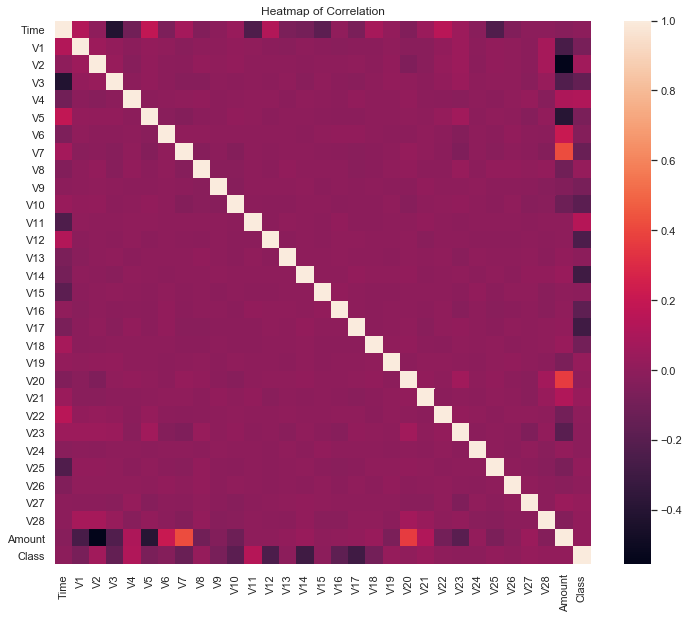

In [22]:
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [23]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [25]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,0,-0.325475
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,0,-0.324774
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0,-0.328797
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,0,-0.273092
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0,-0.329277


In [26]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 169876 to 97365
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   V1                28481 non-null  float64
 1   V2                28481 non-null  float64
 2   V3                28481 non-null  float64
 3   V4                28481 non-null  float64
 4   V5                28481 non-null  float64
 5   V6                28481 non-null  float64
 6   V7                28481 non-null  float64
 7   V8                28481 non-null  float64
 8   V9                28481 non-null  float64
 9   V10               28481 non-null  float64
 10  V11               28481 non-null  float64
 11  V12               28481 non-null  float64
 12  V13               28481 non-null  float64
 13  V14               28481 non-null  float64
 14  V15               28481 non-null  float64
 15  V16               28481 non-null  float64
 16  V17               28481 non-null  f

In [28]:
y.head()

,Class
169876,0
127467,0
137900,0
21513,0
134700,0


# splitting x and y

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [30]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
187312,-0.332037,1.051703,-0.129951,-0.622234,0.575006,-1.045691,1.253179,-0.512433,0.551195,0.567921,...,0.265841,-0.289073,-0.235837,0.109399,0.016517,-0.604663,0.135007,0.198718,0.034073,-0.248248
235927,0.039443,-4.265278,-2.907907,0.181922,-1.521177,-1.095879,1.489105,-0.780382,-0.639555,0.281546,...,2.232621,0.868856,0.023698,-0.975243,0.150192,-0.126670,-0.166181,-0.270911,0.123432,3.913185
80695,-0.403042,1.102567,1.390620,-0.153212,0.343935,-0.605229,0.764210,-0.115231,-0.582643,-0.350334,...,0.216558,-0.240960,-0.567049,-0.096097,-0.093256,-0.075939,0.097197,0.273282,0.119863,-0.325475
51145,1.263361,0.145220,0.340288,0.091951,-0.442896,-1.113045,0.165025,-0.317986,-0.057839,-0.182467,...,0.038772,-0.205966,-0.573076,0.081517,0.466165,0.212101,0.809102,-0.080087,0.010679,-0.260209
241020,-0.954076,0.651764,0.819535,-2.391533,-0.194032,0.810651,-1.550834,-3.339723,-0.906848,-0.735852,...,0.571410,-0.005620,1.654356,-0.044942,0.298802,-0.106292,-0.129382,0.175252,0.206410,-0.324700


In [31]:
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,random_state=0,n_jobs=-1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

C:\Users\SRAVAN KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
pipe=Pipeline([("sc",StandardScaler()),("rf",RandomForestClassifier(n_estimators=10,random_state=0))])

In [34]:
(x_train,y_train)

(              V1        V2        V3        V4        V5        V6        V7  \
 187312 -0.332037  1.051703 -0.129951 -0.622234  0.575006 -1.045691  1.253179   
 235927  0.039443 -4.265278 -2.907907  0.181922 -1.521177 -1.095879  1.489105   
 80695  -0.403042  1.102567  1.390620 -0.153212  0.343935 -0.605229  0.764210   
 51145   1.263361  0.145220  0.340288  0.091951 -0.442896 -1.113045  0.165025   
 241020 -0.954076  0.651764  0.819535 -2.391533 -0.194032  0.810651 -1.550834   
 ...          ...       ...       ...       ...       ...       ...       ...   
 157613  1.962047  0.459489 -1.420699  1.521355  0.623170 -0.556809  0.153851   
 163146 -0.034069  0.235975 -0.266762 -1.776095  2.467342  3.783360 -0.249907   
 125310  0.910072 -0.323932  0.430441  1.175283 -0.570314 -0.196697 -0.077736   
 14592  -0.377066  0.984515  0.988848 -0.261443  0.563332  0.197124  0.489867   
 264876 -1.042437 -1.502482  0.163939 -0.460260 -0.488177  0.233567  1.247327   
 
               V8        V

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9994148624926857